In [1]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

## Listado de cosas pendientes


1. [X] Data week Semana
2. [ ] Construcción modelo matematico 
    - [ ] Un modelo por cada week tipe
    - [X] Modelo que reemplza W por $C_W$
3. [ ] Un modelo por cada week type
4. [ ] Modelo que reemplza W por $C_W$
5. [ ] Ajuste facil de $\ln(P)$, $\ln(Q)$ a $P$, $Q$  
5. [ ] Valoración del producto
    - [ ] Variación porcentual:
        $ \% \triangle \text{Valoración} :=  \dfrac{Precio_{real} - Precio_{Estimado}}{Precio_{Estimado}}$ 
    - [ ] Variación escalar: 
        $\triangle \text{Valoración} := Precio_{real} - Precio_{Estimado}$ 
6. [ ] Grafica de dispersión de los puntos
    - [X] Color equivalente a la Valoración
    - [ ] Una grafica por Semana
    - [X] Recta representado el valor corespondiente a la realción P/Q

## Apuntes


La disposicipon de pago, se construye por etapas.

1. [ ] Se define el modelo de regresión general:
   1. [ ] Como forma introductoria **qué es** (Ecuación).
   2. [ ] Se presenta un rago de precios para este modelo de regresión, por medio de un grafico de dispersión.
   3. [ ] Explicación de lo que representan los coeficientes del modelo.
   4. [ ] Diferencias entre la interpretación de estos si es Log()/Nivel.
2. [ ] Se recoge el atributo del modelo llamado Semanas, estas Poseen la particularidad de influir en el precio, como se mencionó anteriormente, es por ello que se adieren en el modelo.
3. [ ] Las semanas.

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [10]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Dicionario 
rename aplicado a `Precio promedio`

In [11]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

In [12]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

## Datos
- `data_i_RFM`: Facturaciones 
- `Clientes_i_RFM`: RFM Clientes 
- `Df_Week`: Semanas, Con su respectivo cluster 

### Abrir Archivo   Facturaciones


Se debe agregar el parametro `,index_col='Unnamed: 0'` de esta froma tal vez se pueda hacer un merge en base al indice

##### Formación Datos

###### Abrir csvs 

In [13]:
#======================================================================
# R
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT R'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_R = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('R',data_i_R.shape)


#======================================================================
# F
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT F'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_F = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('F',data_i_F.shape)
#======================================================================
# M
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT M'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_M = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('M',data_i_M.shape)



R (198596, 19)
F (198596, 19)
M (198596, 20)


###### Merge 

In [14]:
#======================================================================
# RFM
#=====================================================================

print('RF',(pd.merge(data_i_R,data_i_F )).shape)

print('RFM',pd.merge(pd.merge(data_i_R,
                              data_i_F ) ,
                    data_i_M).shape)
DATA_i_RFM = pd.merge(pd.merge(data_i_R,data_i_F ),data_i_M)

del (data_i_R,data_i_F,data_i_M)

RF (198596, 20)
RFM (198596, 22)


#### Funcion

###### def 

In [15]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data_RFM(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

    
    
#=================================
# Proceso Recency a Int 
#=================================
        
    df['Recency días']=df['Recency'].apply( lambda x:  x.split(' ')[0])
    
#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               RFM
              ,'Recency días'
              ,'Frecuency_Row'
              ,'Monetary'
              ,'Ingreso de Venta CLP'
             ]:
        
        df[i]=df[i].astype('float64').astype('int64')
    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               RFM
              ,'Recency días'
#               ,'Frecuency_Row'
#               ,'Monetary'
               ,'Ingreso de Venta CLP'
             ]:
        df[i]=df[i].astype('int64')     



#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #ELiminado de DF_FULL
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df


###### aplicación 

In [16]:
data_i_RFM=Ajuste_data_RFM(DATA_i_RFM)
data_i_RFM.head(2)

Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingreso de Venta CLP     int64
Monetary                 int64
Recency días             int64
dtype: object
Time Lapsed = 0:0:1.8261616230010986 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Frecuency_Row,Ingreso de Venta CLP,Monetary,Recency días
0,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Especialista en Proc,2007,1010077,19,5,0 days,1,28600,0,0
1,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,...,Especialista en Crud,2007,1020253,464,3,0 days,1,129140,0,0


### Data Customers
 

#### Abrir Datos RFM Clientes

##### Abrir 

In [17]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Clientes_1010078_CT RFM'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Clientes_i_RFM= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Clientes_i_RFM.head(1)

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio
0,10003742,2020-05-23,521,2020-05-23,0.0033444816053511705,22.0,1300.0,2007.0,19.0,28600.0


In [18]:
Clientes_i_RFM.iloc[1]

Cliente                                    10007508
Fecha ultima Compra                      2021-10-26
Recency Actual                                    0
Fecha Creacion                           2018-03-01
Frecuency Actual del Cliente     0.2017524296094161
Kilos Venta KG Promedio           93.15865384615384
Precio Promedio                  1266.8942307692307
Año Creación Promedio                        2007.0
Frecuencia Historica Promedio                 464.0
Ingreso de Venta Promedio        117683.47115384616
Name: 1, dtype: object

##### Función Ajuste 

###### def  `Ajuste_Clientes_RFM`

In [19]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_Clientes_RFM(data):
    start_time = time.time()
    df=data.copy()

# =============================================================================
# Proceso iterativo Pasar a numero
#------------------------------------------------------------------------------

#----------------------------------------------------------------------
# Float
    for i in [
            #RFM
            'Recency Actual'
            ,'Frecuency Actual del Cliente'
            ,'Ingreso de Venta Promedio'
              
            #Val Fact
            ,'Kilos Venta KG Promedio'
            ,'Precio Promedio'
            
            # Val historicos (ind del producto)
            ,'Año Creación Promedio'
            ,'Frecuencia Historica Promedio'
             ]:
        df[i]=df[i].astype('float64')
        #.astype('int64')
        
        
#------------------------------------------------------------------------ 
    # Int
    for i in [
                #RFM
                'Recency Actual'
#                 ,'Frecuency Actual del Cliente'
#                 ,'Ingreso de Venta Promedio'

                #Val Fact
#                 ,'Kilos Venta KG Promedio'
#                 ,'Precio Promedio'

                # Val historicos (ind del producto)
                ,'Año Creación Promedio'
                ,'Frecuencia Historica Promedio'
                ]:
        df[i]=df[i].astype('int64')
        


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    for date in ['Fecha ultima Compra','Fecha Creacion']:
        df[date] = df[date].apply(lambda x: 
                                            datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

##### Aplicación

In [20]:
Clientes_i_RFM=Ajuste_Clientes_RFM(Clientes_i_RFM)

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
Time Lapsed = 0:0:0.09108281135559082 
 H:m:s


In [21]:
Clientes_i_RFM.head()

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692


#### Calcular Atributos de volumen 
Se contruyen los atributos relacionados al ticket de compra

##### Kilo promedio 

In [22]:
df= data_i_RFM
df_g=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .mean().reset_index()\
        .rename(columns={'Kilos Venta KG':Dic_col['Ticket Customers'][0]})
df_g

,Cliente,Ticket Promedio Actual
0,10003742,22.000000
1,10007508,93.158654
2,10017269,22.038462
3,10023880,27.500000
4,10028999,22.000000
...,...,...
5068,9992154,36.171429
5069,9993925,160.517495
5070,9994662,22.000000
5071,9994800,22.000000


##### CV  Coeficiente de variación 

######  Std

In [23]:
df_G=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .std().reset_index()\
        .rename(columns={'Kilos Venta KG':'Ticket std Actual'})
print(
df_G.isnull().sum()
)
df_G=df_G.fillna(0)
df_G.head()

Cliente                0
Ticket std Actual    367
dtype: int64


,Cliente,Ticket std Actual
0,10003742,0.000000
1,10007508,36.215256
2,10017269,0.612474
3,10023880,12.102631
4,10028999,0.000000


###### Coeficiente de variación 

In [24]:
df_group=pd.merge(df_g,df_G,how='right')

df_group[Dic_col['Ticket Customers'][1]]=\
df_group.apply(lambda x: 
               x['Ticket std Actual']/
               x[Dic_col['Ticket Customers'][0]] ,axis=1)
df_group

,Cliente,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual
0,10003742,22.000000,0.000000,0.000000
1,10007508,93.158654,36.215256,0.388748
2,10017269,22.038462,0.612474,0.027791
3,10023880,27.500000,12.102631,0.440096
4,10028999,22.000000,0.000000,0.000000
...,...,...,...,...
5068,9992154,36.171429,18.376080,0.508027
5069,9993925,160.517495,81.963154,0.510618
5070,9994662,22.000000,0.000000,0.000000
5071,9994800,22.000000,0.000000,0.000000


In [25]:
Dic_col['RFM Customers'][1]

'Frecuency Actual del Cliente'

#### Merge 

In [26]:
Clientes_i=pd.merge(Clientes_i_RFM,df_group)
Clientes_i['$F^{-1}$ Actual']=Clientes_i[Dic_col['RFM Customers'][1]].apply( lambda x: x**(-1))
Clientes_i.shape

(5073, 14)

In [27]:
Clientes_i.head()

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000,22.000000,0.000000,0.000000,299.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154,93.158654,36.215256,0.388748,4.956570
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718,22.038462,0.612474,0.027791,16.845022
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000,27.500000,12.102631,0.440096,25.258465
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692,22.000000,0.000000,0.000000,57.008334


### Data Week

In [28]:
# file_direct_O+'Weeks_clusters_1010078_CT_2018_2021 Other val 2020_2021'+'.csv'

##### Abrir 

In [29]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=\
file_direct_O+'Weeks_clusters_1010078_CT_2018_2021 Other val 2020_2021'+'.csv'

col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Df_Week= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Df_Week.head(1)

,Variable,Atributo,Semana,Ingresos de Venta,Cant compras,Precio Promedio Ponderado CLP / KG,Ventas promedio Kg,Precio Promedio,Coef.,$e^{βi}$,$\%\triangle Y$,Tipo de Semana
0,Semana_1,Semana,1,210715690,1688,1401.8833868896738,89.04561611374407,1486.5527251184835,0.0,1.0,0.0,3


## data con Week type 

In [30]:
Df_Week[['Semana','Tipo de Semana']].dtypes

Semana            object
Tipo de Semana    object
dtype: object

In [31]:
data_i_RFM[['Semana','Año']].dtypes

Semana    object
Año       object
dtype: object

In [32]:
pd.merge(
Df_Week[['Semana','Tipo de Semana']]
,data_i_RFM[['Semana','Año']]
)

,Semana,Tipo de Semana,Año
0,1,3,2019
1,1,3,2019
2,1,3,2019
3,1,3,2020
4,1,3,2019
...,...,...,...
198591,53,4,2020
198592,53,4,2020
198593,53,4,2020
198594,53,4,2020


# Log-Log con Tipo de semana

[Logaritmos en econometría](https://economipedia.com/definiciones/logaritmos-en-econometria.html)

**Data a usar**
>`Data=data_i_RFM.copy()`
\begin{equation}
 \ln{(P(Q,C_w,A))} = 
 \beta_0 + \beta_1\ln{(Q)}   +\sum_{i\in C_w} \beta_i {c_w}_i + \beta_a A 
\end{equation}

 -  $P:$ Precio Estimado
 -  $Q:$ Peso neto  Kg.(_Variable discreta_)
  -  ${c_w}_i:$ Tipo de Semana $i$ del conjunto de grupos $C_w$ (_Variable binaria_)
     \begin{equation*}
                {c_w}_i= \left\{ 
                    \begin{array}{l}
                    % w_i = 1 \text{,  si la compra es efectuada en la semana i}\\
                    1 \text{,  si la compra es efectuada en el tipo de semana $i$}\\
                    0 \text{,  la compra no es efectuada en el tipo de semana $i$}
                \end{array} \right. 
             \end{equation*}
 -  $A:$ Año el cual se ejecuta la venta.(_Variable discreta_)

##### Copia de la data Grande
`Data`

In [197]:
Data=pd.merge(
Df_Week[['Semana','Tipo de Semana']]
,data_i_RFM
).copy()

Semanas
--------
Log - Log P/Q

\begin{equation}
\ln{(P(Q,C_w,A))} = 
 \beta_0 + \beta_1\ln{(Q)}   +\sum_{i\in C_w} \beta_i {c_w}_i + \beta_a A 
\end{equation}

 -  $P:$ Precio Estimado
 -  $Q:$ Peso neto  Kg.(_Variable discreta_)
  -  ${c_w}_i:$ Tipo de Semana $i$ del conjunto de grupos $C_w$ (_Variable binaria_)
     \begin{equation*}
                {c_w}_i= \left\{ 
                    \begin{array}{l}
                    % w_i = 1 \text{,  si la compra es efectuada en la semana i}\\
                    1 \text{,  si la compra es efectuada en el tipo de semana $i$}\\
                    0 \text{,  la compra no es efectuada en el tipo de semana $i$}
                \end{array} \right. 
             \end{equation*}
 -  $A:$ Año el cual se ejecuta la venta.(_Variable discreta_)

## Construcción del modelo 

Se utilizan todos los datos, por tanto todos los años

### Datos  a Usar

###### Data Base 

In [198]:
Data.columns[1]

'Tipo de Semana'

In [211]:
#===================================
#Ajuste de los datos
#-----------------------------------
X_Columnas=['Kilos Venta KG','Año','Tipo de Semana']
y_pred_Columna='Precio'

y=Data[y_pred_Columna].copy()
X=Data[ X_Columnas ].copy()


In [200]:
#===================================
#Ajuste de los datos
#-----------------------------------
X_Columnas=['Kilos Venta KG','Año','Tipo de Semana']
y_pred_Columna='Precio'

# y=Data[Data.Año>='2019'][y_pred_Columna].copy()
# X=Data[Data.Año>='2019'][ X_Columnas ].copy()


###### Cambios y ajustes 

In [212]:
#Aplico Ln a y
y=y.apply(lambda x: np.log(x))

X['Kilos Venta KG']=X['Kilos Venta KG'].apply(lambda x: np.log(x))

#X['Semana']=X['Semana'].astype('category')
if('Año' in X_Columnas):
    X['Año']=X['Año'].astype('int64')
    X['Año']= X['Año']-X['Año'].min() #2018
if('Semana' in X_Columnas):
    X['Semana']=X['Semana'].astype('category')
    
if('Tipo de Semana' in X_Columnas):
    X['Tipo de Semana']=X['Tipo de Semana'].astype('category')
    
print(X.dtypes,'\n'+'='*50)

# Dummies
X=pd.get_dummies(X, drop_first=True)


#Calculo de la correlación entre variables
print('Correlación Variables sobre la Variable ', y_pred_Columna,
    '\n'+'-'*50+'\n' ,pd.merge(y.reset_index(),X.reset_index()).corr()[y_pred_Columna])

Kilos Venta KG     float64
Año                  int64
Tipo de Semana    category
dtype: object 
Correlación Variables sobre la Variable  Precio 
--------------------------------------------------
 index               0.138711
Precio              1.000000
Kilos Venta KG     -0.401401
Año                 0.290987
Tipo de Semana_1   -0.024676
Tipo de Semana_2    0.218602
Tipo de Semana_3    0.224698
Tipo de Semana_4    0.194520
Name: Precio, dtype: float64


### Entrenamiento 

##### Paso de siempre 

In [213]:

#===================================
# Entrenamiento
#-----------------------------------
#SPLIT TEST OR TRAIN

#OLS requiere de un intercepto

X['Intecepto']=[1 for i in range(X.shape[0])]

#se agrega el intercepto a la ecuación

# y=y/y.max()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# TRAIN MODEL
# from sklearn.linear_model import Ridge
# ridge = Ridge().fit(X_train, y_train)

import sklearn
import statsmodels.api as sm
mod = sm.OLS(y_train,X_train)
fii = mod.fit()
print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train,fii.predict()))
print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test,fii.predict(exog=X_test)))


#==========================================
# Todos los datos, desde ell 2018
# $R^2$ Data Train 0.4378602682377155
# $R^2$ Data Test 0.43860226392178925

$R^2$ Data Train 0.4378602682377155
$R^2$ Data Test 0.43860226392178925


##### Función para extraer una muestra distinta

Muestra de 20.000 casos

```
        Rtrain	        RTest
count	20000.000000	20000.000000
mean	0.440049	0.439892
std	0.002121	0.006309
min	0.433608	0.417494
25%	0.438516	0.435745
50%	0.439768	0.440668
75%	0.441422	0.444475
max	0.447698	0.459401
```

###### Función 

In [214]:
def train_mod_OLS(X_f,y_f,Rand_num):
    """
    train_mod_OLS(X,y,Rand_num)
    
    return: '$R^2$ Data Train'
            '$R^2$ Data Test'
    """
    X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_f, y_f, random_state=Rand_num)
    # TRAIN MODEL
    # from sklearn.linear_model import Ridge
    # ridge = Ridge().fit(X_train_def, y_train_def)

    import sklearn
    import statsmodels.api as sm
    mod_def = sm.OLS(y_train_def,X_train_def)
    fii_def = mod.fit()
#     print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train,fii.predict()))
#     print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test_def,fii.predict(exog=X_test)))
    return(sklearn.metrics.r2_score(y_train_def,fii_def.predict()),
           sklearn.metrics.r2_score(y_test_def,fii_def.predict(exog=X_test))
           ,fii_def)

###### Aplicación 

In [215]:
df_fit_example=pd.DataFrame([train_mod_OLS(X,y,i)[:2]   for i in range(2*10**2)],columns=['Rtrain','RTest'])
print('intervao de confianza Rtrain'
,"{:,.3f}".format(df_fit_example.Rtrain.mean())
,"{:,.3f}".format(
(1.96*df_fit_example.Rtrain.std()/\
df_fit_example.Rtrain.count()**(0.5))
))

print('intervao de confianza RTest'
,"{:,.2f}".format(
df_fit_example.RTest.mean()
), '+/-',
"{:,.2f}".format(
    1.96*df_fit_example.RTest.std()/\
    df_fit_example.RTest.count()**(0.5))
    )


intervao de confianza Rtrain -0.430 0.009
intervao de confianza RTest -0.44 +/- 0.01


## Resultados del modelo

In [204]:
print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train,fii.predict()).round(3)  )
print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test,fii.predict(exog=X_test)).round(3) )

$R^2$ Data Train 0.442
$R^2$ Data Test 0.433


### Summary 

###### General 

In [56]:
# p_values = fii.summary2().tables[1]['P>|t|']
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Precio   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        14:04:00   Log-Likelihood:             1.5600e+05
No. Observations:              127366   AIC:                        -3.120e+05
Df Residuals:                  127359   BIC:                        -3.119e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Kilos Venta KG      -0.0358      0.000   -165.659      0.000      -0.036      -0.035
Año                  0.0263      0.000    100.724      0.000       0.026       0.027
Tipo de Semana_1     0.0412      0.001     81.210      0.000       0.040       0.042
Tipo de Semana_2     0.0926      0.000    189.836      0.000       0.092       0.094
Tipo de Semana_3     0.1659      0.001    167.883      0.000       0.164       0.168
Tipo de Semana_4     0.2338      0.002    138.878      0.000       0.231       0.237
Intecepto            7.2289      0.001   7583.202      0.000       7.227       7.231
==============================================================================
Omnibus:                    32218.518   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           467092.583
Skew:                          -0.822   Prob(JB):                         0.00
Kurtosis:                      12.237   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variables Despliege completo 

##### Completo

In [57]:
fii.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Kilos Venta KG,-0.035806,0.000216,-165.659326,0.0,-0.036229,-0.035382
Año,0.026323,0.000261,100.723866,0.0,0.025811,0.026836
Tipo de Semana_1,0.041166,0.000507,81.209530,0.0,0.040173,0.042160
Tipo de Semana_2,0.092612,0.000488,189.836157,0.0,0.091656,0.093568
Tipo de Semana_3,0.165884,0.000988,167.882610,0.0,0.163947,0.167821
Tipo de Semana_4,0.233834,0.001684,138.878047,0.0,0.230534,0.237134
Intecepto,7.228877,0.000953,7583.202129,0.0,7.227009,7.230746


#### Dummy Agrupado

###### Data inicio 

In [58]:
print(type(fii.summary2().tables[1]))
df_Var_Modelo=fii.summary2().tables[1].copy()
df_Var_Modelo=df_Var_Modelo.reset_index()\
                .rename(columns={'index':'Variable'})
df_Var_Modelo.head()

<class 'pandas.core.frame.DataFrame'>


,Variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,Kilos Venta KG,-0.035806,0.000216,-165.659326,0.0,-0.036229,-0.035382
1,Año,0.026323,0.000261,100.723866,0.0,0.025811,0.026836
2,Tipo de Semana_1,0.041166,0.000507,81.209530,0.0,0.040173,0.042160
3,Tipo de Semana_2,0.092612,0.000488,189.836157,0.0,0.091656,0.093568
4,Tipo de Semana_3,0.165884,0.000988,167.882610,0.0,0.163947,0.167821


In [59]:
print(37-3,
df_Var_Modelo[['Variable','P>|t|']].iloc[3:37].shape)
df_Var_Modelo[['Variable','P>|t|']].iloc[3:37]

34 (4, 2)


,Variable,P>|t|
3,Tipo de Semana_2,0.0
4,Tipo de Semana_3,0.0
5,Tipo de Semana_4,0.0
6,Intecepto,0.0


###### Función 

In [60]:
import re
def Col_Dummy(txt,Col_df,ind):
    """
    Extrae la columna original ( Col_df) del dummy,
    Si no es dummy, cuando ind = 1, entrega un 0. Else, entrega la categoria del dummy
    """
    
    for c in X_Columnas:
        if(re.search('^'+c, txt) is not None):
            if(re.search('^'+c+'_', txt) is not None):
                post=re.search('^'+c+'_', txt).span()[1]
                return(c,txt[post:])[ind]
            else:
                return(c,0)[ind]
    return(0,0)[ind]
df_Var_Modelo['Atributo']=df_Var_Modelo.Variable.apply(lambda x: Col_Dummy(x,X_Columnas,0) )
df_Var_Modelo['Val Categoria']=df_Var_Modelo.Variable.apply(lambda x: Col_Dummy(x,X_Columnas,1) )

#=========================================
# Ajuste de Val Categoria a numero entero
#-----------------------------------------

df_Var_Modelo['Val Categoria']=df_Var_Modelo['Val Categoria'].astype('float64')

df_Var_Modelo['Val Categoria'] =df_Var_Modelo['Val Categoria'].astype('int64')

#Ordenar en base al numero de la semana
df_Var_Modelo=df_Var_Modelo.sort_values(by=['Val Categoria']).reset_index()

#eliminar la columna index
df_Var_Modelo=df_Var_Modelo.drop(labels='index',axis=1)

df_Var_Modelo.head()

,Variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],Atributo,Val Categoria
0,Kilos Venta KG,-0.035806,0.000216,-165.659326,0.0,-0.036229,-0.035382,Kilos Venta KG,0
1,Año,0.026323,0.000261,100.723866,0.0,0.025811,0.026836,Año,0
2,Intecepto,7.228877,0.000953,7583.202129,0.0,7.227009,7.230746,0,0
3,Tipo de Semana_1,0.041166,0.000507,81.209530,0.0,0.040173,0.042160,Tipo de Semana,1
4,Tipo de Semana_2,0.092612,0.000488,189.836157,0.0,0.091656,0.093568,Tipo de Semana,2


In [61]:
df_Var_Modelo.tail()

,Variable,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],Atributo,Val Categoria
2,Intecepto,7.228877,0.000953,7583.202129,0.0,7.227009,7.230746,0,0
3,Tipo de Semana_1,0.041166,0.000507,81.209530,0.0,0.040173,0.042160,Tipo de Semana,1
4,Tipo de Semana_2,0.092612,0.000488,189.836157,0.0,0.091656,0.093568,Tipo de Semana,2
5,Tipo de Semana_3,0.165884,0.000988,167.882610,0.0,0.163947,0.167821,Tipo de Semana,3
6,Tipo de Semana_4,0.233834,0.001684,138.878047,0.0,0.230534,0.237134,Tipo de Semana,4


In [62]:
print(df_Var_Modelo[df_Var_Modelo.Variable=='Año']['Coef.'])
np.e**df_Var_Modelo[df_Var_Modelo.Variable=='Año']['Coef.'].iloc[0]

1    0.026323
Name: Coef., dtype: float64


1.0266729675802362

#### Todas las caract 

In [65]:
df_Var_Modelo.Variable

0      Kilos Venta KG
1                 Año
2           Intecepto
3    Tipo de Semana_1
4    Tipo de Semana_2
5    Tipo de Semana_3
6    Tipo de Semana_4
Name: Variable, dtype: object

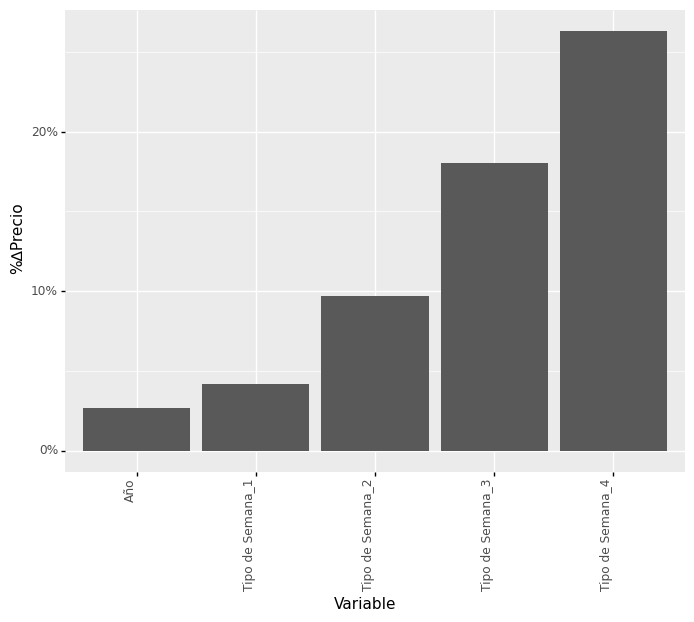

<ggplot: (147442185867)>

In [72]:
###################################################################
#                     Clusterizado(Forma)
#           Centroides(Lineas amarillas)
#    Grafica de dispercion Delta ponderado 
#    X=Semana Y=Delta ponderado
###################################################################
Grap_Var=(ggplot(df_Var_Modelo[(df_Var_Modelo.Variable!='Intecepto')
                              &(df_Var_Modelo.Variable!='Kilos Venta KG')
                              ], aes(x='Variable'
                                    ,y=df_Var_Modelo[
                                        (df_Var_Modelo.Variable!='Intecepto')
                                         &(df_Var_Modelo.Variable!='Kilos Venta KG')]['Coef.']\
                                                                         .apply(lambda x: np.e**(x)-1)
#                ,size='Ventas promedio Kg',color='Precio Promedio Ponderado CLP / KG'
                 ))\
+ geom_col()
# #     aes(shape='Tipo de Semana'),alpha=0.9)\
# + scale_color_gradient(low='blue', high='red')\
#  + geom_hline(yintercept = centroids,color='yellow',
#                 # set line colour
#                 size=3,# set line thickness
#                 linetype="dashed",alpha=0.5  # set line type
# ) # add many horizontal lines using a list

+ylab('%∆Precio')
+ scale_y_continuous(labels=percent_format()) # display labels as a percentage       
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,6))
                  )
Grap_Var

# Log-Log para cada Tipo de semana

[Logaritmos en econometría](https://economipedia.com/definiciones/logaritmos-en-econometria.html)

**Data a usar**
>`Data=data_i_RFM.copy()`
\begin{equation}
ln(P(Q,A)_j) =\beta_{0,j} +\beta_{1,j} ln(Q_{j}) +\beta_{0,j} A_{j}\\
\text{ Sea }j \text{ el tipo de semana.} \nonumber
\end{equation}

 -  $P_j:$ Precio Estimado, de la semana $j$
 -  $Q_j:$ Peso neto  Kg.(_Variable discreta_), de la semana $j$ 
 -  $A_j:$ Año el cual se ejecuta la venta.(_Variable discreta_), de la semana $j$

##### Copia de la data Grande
`Data`

In [73]:
Data=pd.merge(
Df_Week[['Semana','Tipo de Semana']]
,data_i_RFM
).copy()

Semanas
--------
Log - Log P/Q

\begin{equation}
\ln{(P(Q,C_w,A))} = 
 \beta_0 + \beta_1\ln{(Q)}   +\sum_{i\in C_w} \beta_i {c_w}_i + \beta_a A 
\end{equation}

 -  $P:$ Precio Estimado
 -  $Q:$ Peso neto  Kg.(_Variable discreta_)
  -  ${c_w}_i:$ Tipo de Semana $i$ del conjunto de grupos $C_w$ (_Variable binaria_)
     \begin{equation*}
                {c_w}_i= \left\{ 
                    \begin{array}{l}
                    % w_i = 1 \text{,  si la compra es efectuada en la semana i}\\
                    1 \text{,  si la compra es efectuada en el tipo de semana $i$}\\
                    0 \text{,  la compra no es efectuada en el tipo de semana $i$}
                \end{array} \right. 
             \end{equation*}
 -  $A:$ Año el cual se ejecuta la venta.(_Variable discreta_)

## Construcción del modelo 

Se utilizan todos los datos, por tanto todos los años



Se debe tener una función que permita construir el modelo OLS de forma simple, con un val random y un valor de Data, para definir los valores.

### Datos  a Usar

###### Data Base 

In [82]:
Data[Data.columns[1]].unique()

array(['3', '2', '1', '0', '4'], dtype=object)

### Función 

##### Funcion 

Se debe partiocionar antes, para que se tenga el mismo x test e y test para todos, si particiono dentro de la funcion si o si van a aser distintas muestras a las utilizadas en el otro metodo de modelo

###### Def

In [180]:
import sklearn
import statsmodels.api as sm

def Log_P_LogQA(Dfun,Rand_num):
    """
    train_mod_OLS(X,y,Rand_num)
    
    return: '$R^2$ Data Train'
            '$R^2$ Data Test'
            'Model fii'
    """
    #===================================
    #Ajuste de los datos
    #-----------------------------------
    X_Columnas_def=['Kilos Venta KG','Año']
    y_pred_Columna_def='Precio'
    y_def=Dfun[y_pred_Columna_def].copy()
    X_def=Dfun[ X_Columnas_def ].copy()

    #==============================================================================
    #                     Transformación a Log log
    y_def=y_def.apply(lambda x: np.log(x))

    X_def['Kilos Venta KG']=X_def['Kilos Venta KG'].apply(lambda x: np.log(x))

    #==============================================================================
    #         Variables a cgoricas o enteras
    if('Año' in X_Columnas):
        #año a entero
        X_def['Año']=X_def['Año'].astype('int64')
        #tomo el primer año de la data para que sea más escalar
        X_def['Año']= X_def['Año']-X_def['Año'].min() #2018

    #-----------------------------------------------
    #         Semana a categorico
    if('Semana' in X_Columnas_def):
        X_def['Semana']=X_def['Semana'].astype('category')

#     print(X_def.dtypes,'\n'+'='*50)

    #-----------------------------------------------
    #                 Dummies
    X_def=pd.get_dummies(X_def, drop_first=True)
    #============================================================

    # #Calculo de la correlación entre variables
    # print('Correlación Variables sobre la Variable ', y_pred_Columna,
    #     '\n'+'-'*50+'\n' ,pd.merge(y.reset_index(),X.reset_index()).corr()[y_pred_Columna])

    #-----------------------------------------------
    # Intercepto
    X_def['Intecepto']=[1 for i in range(X_def.shape[0])]

    X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def,
                                                                        random_state=Rand_num)
    #Dimenciones
#     for i in [X_train_def, X_test_def, y_train_def, y_test_def]: print(i.shape)
    
    #===========================================================
    #                         TRAIN MODEL
    #-----------------------------------------------------------
    # from sklearn.linear_model import Ridge
    # ridge = Ridge().fit(X_train_def, y_train_def)

    mod_def = sm.OLS(y_train_def,X_train_def)
    fii_def = mod_def.fit()
    
#     print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train_def,fii_def.predict()))
#     print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test_def,fii_def.predict(exog=X_test_def)))
    return [sklearn.metrics.r2_score(y_train_def,fii_def.predict())
           ,sklearn.metrics.r2_score(y_test_def,fii_def.predict(exog=X_test_def))
           ,fii_def]

In [181]:
Log_P_LogQA(Data[Data['Tipo de Semana']==('0')]
            ,0)
# (0.32344356565566623,
#  0.33527087969724223,

[0.32344356565566623,
 0.33527087969724223,

###### Aplicación iterativa

In [182]:
array_mod=[ [i] + Log_P_LogQA(Data[Data['Tipo de Semana']==(i)],0) for i in Data['Tipo de Semana'].unique()]
data_Mod_week=pd.DataFrame(array_mod
            ,columns=[
                'Tipo de Semana'
                ,'$R^2$ Data Train'
                ,'$R^2$ Data Test'
                ,'Model fii']
            )
data_Mod_week

,Tipo de Semana,$R^2$ Data Train,$R^2$ Data Test,Model fii
0,3,0.177824,0.143026,<statsmodels.regression.linear_model.Regressio...
1,2,0.357274,0.360072,<statsmodels.regression.linear_model.Regressio...
2,1,0.314957,0.319715,<statsmodels.regression.linear_model.Regressio...
3,0,0.323444,0.335271,<statsmodels.regression.linear_model.Regressio...
4,4,0.174830,0.203055,<statsmodels.regression.linear_model.Regressio...


##### Función Con el mismo Data Frame 

###### Def Data

`Week_data_def`

In [141]:
import sklearn
import statsmodels.api as sm

def Week_data_def(Dfun,Rand_num):
    #===================================
    #Ajuste de los datos
    #-----------------------------------
    X_Columnas_def=['Kilos Venta KG','Año','Tipo de Semana']
    y_pred_Columna_def=['Precio','Tipo de Semana']
    #Y
    y_def=Dfun[y_pred_Columna_def].copy()
    #X
    X_def=Dfun[ X_Columnas_def ].copy()

    #==============================================================================
    #                     Transformación a Log log
    
    y_def.Precio=y_def.Precio.apply(lambda x: np.log(x))

    X_def['Kilos Venta KG']=X_def['Kilos Venta KG'].apply(lambda x: np.log(x))

    #==============================================================================
    #         Variables a cgoricas o enteras
    if('Año' in X_Columnas):
        #año a entero
        X_def['Año']=X_def['Año'].astype('int64')
        #tomo el primer año de la data para que sea más escalar
        X_def['Año']= X_def['Año']-X_def['Año'].min() #2018

    #-----------------------------------------------
    #         Semana a categorico
    if('Semana' in X_Columnas_def):
        X_def['Semana']=X_def['Semana'].astype('category')

#     print(X_def.dtypes,'\n'+'='*50)
    
    #-----------------------------------------------
    #                 Dummies
#     X_def=pd.get_dummies(X_def, drop_first=True)
    #============================================================

    # #Calculo de la correlación entre variables
    # print('Correlación Variables sobre la Variable ', y_pred_Columna,
    #     '\n'+'-'*50+'\n' ,pd.merge(y.reset_index(),X.reset_index()).corr()[y_pred_Columna])

    #-----------------------------------------------
    # Intercepto
    X_def['Intecepto']=[1 for i in range(X_def.shape[0])]

    X_train_def_T, X_test_def_T, y_train_def_T, y_test_def_T = train_test_split(X_def, y_def,
                                                                        random_state=Rand_num)
    #Dimenciones
#     for i in [X_train_def, X_test_def, y_train_def, y_test_def]: print(i.shape)
    return(X_train_def_T, X_test_def_T, y_train_def_T, y_test_def_T)


###### Def Fitt Select week 

`Week_Log_P_LogQA`

In [167]:

def Week_Log_P_LogQA( A_def_t,Tipo_de_Semana_i):
    """
    Week_Log_P_LogQA(X,y,Week,Rand_num)
    
    return: '$R^2$ Data Train'
            '$R^2$ Data Test'
            'Model fii'
    """
#     Arreglo a var
#     X_train_def_T, X_test_def_T, y_train_def_T, y_test_def_T = A_def_t
    
    X_train_def, X_test_def, y_train_def, y_test_def=\
    [i[i['Tipo de Semana']==Tipo_de_Semana_i].drop(
                                                    ['Tipo de Semana'], axis=1) 
                                                    for i in A_def_t]
#     return(X_train_def, X_test_def, y_train_def, y_test_def)
        #Dimenciones
#     for i in [X_train_def, X_test_def, y_train_def, y_test_def]: print(i.shape)

    #===========================================================
    #                         TRAIN MODEL
    #-----------------------------------------------------------
    #### from sklearn.linear_model import Ridge
    #### ridge = Ridge().fit(X_train_def, y_train_def)

    mod_def = sm.OLS(y_train_def,X_train_def)
    fii_def = mod_def.fit()
    
###     print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train_def,fii_def.predict()))
###     print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test_def,fii_def.predict(exog=X_test_def)))
    return [sklearn.metrics.r2_score(y_train_def,fii_def.predict())
           ,sklearn.metrics.r2_score(y_test_def,fii_def.predict(exog=X_test_def))
           ,fii_def]

In [149]:
a,b,c=[1,2,4]
print(a,b,c)

1 2 4


In [169]:
A_Muestras=Week_data_def(Data,0)

In [168]:
Week_Log_P_LogQA(A_Muestras,'4')

[0.18647687109941768,
 0.16743184722890403,

### Aplicación iterativa

In [184]:
A_Muestras=Week_data_def(Data,0)
array_mod=[ [i]+ 
           Week_Log_P_LogQA( A_Muestras , i) 
           for i in Data['Tipo de Semana'].unique()]
data_Mod_week_split=pd.DataFrame(array_mod
            ,columns=[
                'Tipo de Semana'
                ,'$R^2$ Data Train'
                ,'$R^2$ Data Test'
                ,'Model fii']
            )
data_Mod_week_split

,Tipo de Semana,$R^2$ Data Train,$R^2$ Data Test,Model fii
0,3,0.168075,0.174286,<statsmodels.regression.linear_model.Regressio...
1,2,0.355879,0.363835,<statsmodels.regression.linear_model.Regressio...
2,1,0.316439,0.315611,<statsmodels.regression.linear_model.Regressio...
3,0,0.320725,0.343729,<statsmodels.regression.linear_model.Regressio...
4,4,0.186477,0.167432,<statsmodels.regression.linear_model.Regressio...


## Resultado del modelo 

In [196]:
data_Mod_week_split.mean().round(3)

Tipo de Semana      6420.800
$R^2$ Data Train       0.270
$R^2$ Data Test        0.273
dtype: float64

In [205]:
print(data_Mod_week_split.sort_values('Tipo de Semana')[[
                'Tipo de Semana'
                ,'$R^2$ Data Train'
                ,'$R^2$ Data Test']].round(3).to_latex())
data_Mod_week_split.sort_values('Tipo de Semana')[[
                'Tipo de Semana'
                ,'$R^2$ Data Train'
                ,'$R^2$ Data Test']].round(3)

\begin{tabular}{llrr}
\toprule
{} & Tipo de Semana &  \$R\textasciicircum 2\$ Data Train &  \$R\textasciicircum 2\$ Data Test \\
\midrule
3 &              0 &             0.321 &            0.344 \\
2 &              1 &             0.316 &            0.316 \\
1 &              2 &             0.356 &            0.364 \\
0 &              3 &             0.168 &            0.174 \\
4 &              4 &             0.186 &            0.167 \\
\bottomrule
\end{tabular}



,Tipo de Semana,$R^2$ Data Train,$R^2$ Data Test
3,0,0.321,0.344
2,1,0.316,0.316
1,2,0.356,0.364
0,3,0.168,0.174
4,4,0.186,0.167


# Curva del modelo Elegido 

In [226]:
Df.columns

Index(['Semana', 'Tipo de Semana', 'Material (Nombre)', 'Kilos Venta KG',
       'Precio', 'Día natural', 'Día Semana', 'Mes', 'Año', 'Población',
       'Centro', 'Cliente', 'Cluster', 'Segmento.1', 'Categoría Cliente',
       'Año Creación', 'Material Favorito', 'Frecuencia Historica', 'Mes_num',
       'Recency', 'Frecuency_Row', 'Ingreso de Venta CLP', 'Monetary',
       'Recency días'],
      dtype='object')

In [232]:
import sklearn
import statsmodels.api as sm

def X_set(X):
    X_Set_Def=X.copy()

    X_Set_Def['Kilos Venta KG']=X_Set_Def['Kilos Venta KG'].apply(lambda x: np.log(x))
    
    if('Año' in X_Set_Def.columns):
        X_Set_Def['Año']=X_Set_Def['Año'].astype('int64')
        X_Set_Def['Año']= X_Set_Def['Año']-X_Set_Def['Año'].min() #2018
    
    if('Semana' in X_Set_Def.columns):
        X_Set_Def['Semana']=X_Set_Def['Semana'].astype('category')

    if('Tipo de Semana' in X_Set_Def.columns):
        X_Set_Def['Tipo de Semana']=X_Set_Def['Tipo de Semana'].astype('category')
    
    print(X_Set_Def.dtypes,'\n'+'='*50)

    # Dummies
    X_Set_Def=pd.get_dummies(X_Set_Def, drop_first=True)
    
    X_Set_Def['Intecepto']=[1 for i in range(X_Set_Def.shape[0])]
    return(X_Set_Def)

def Func_log_log_Tip_week(Data_F):
    #===================================
    #Ajuste de los datos
    #-----------------------------------
    X_Columnas=['Kilos Venta KG','Año','Tipo de Semana']
    y_pred_Columna='Precio'

    y=Data_F[y_pred_Columna].copy()
    X=X_set(Data_F[ X_Columnas ].copy())


    #Aplico Ln a y
    y=y.apply(lambda x: np.log(x))

    
#     X['Kilos Venta KG']=X['Kilos Venta KG'].apply(lambda x: np.log(x))

#     #X['Semana']=X['Semana'].astype('category')
#     if('Año' in X_Columnas):
#         X['Año']=X['Año'].astype('int64')
#         X['Año']= X['Año']-X['Año'].min() #2018
#     if('Semana' in X_Columnas):
#         X['Semana']=X['Semana'].astype('category')

#     if('Tipo de Semana' in X_Columnas):
#         X['Tipo de Semana']=X['Tipo de Semana'].astype('category')

#     print(X.dtypes,'\n'+'='*50)

#     # Dummies
#     X=pd.get_dummies(X, drop_first=True)

#     #OLS requiere de un intercepto

#     X['Intecepto']=[1 for i in range(X.shape[0])]

#     #se agrega el intercepto a la ecuación

    #Calculo de la correlación entre variables
    print('Correlación Variables sobre la Variable ', y_pred_Columna,
        '\n'+'-'*50+'\n' ,pd.merge(y.reset_index(),X.reset_index()).corr()[y_pred_Columna])

    #===================================
    # Entrenamiento
    #-----------------------------------
    #SPLIT TEST OR TRAIN


    # y=y/y.max()

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


    # TRAIN MODEL
    # from sklearn.linear_model import Ridge
    # ridge = Ridge().fit(X_train, y_train)


    mod = sm.OLS(y_train,X_train)
    fii = mod.fit()
    print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train,fii.predict()).round(3) )
    print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test,fii.predict(exog=X_test)).round(3))


    #==========================================
    # Todos los datos, desde ell 2018
    # $R^2$ Data Train 0.4378602682377155
    # $R^2$ Data Test 0.43860226392178925
    return(fii)

In [224]:
Df=Data.copy()

In [233]:
Fit_M=Func_log_log_Tip_week(Df)

Kilos Venta KG     float64
Año                  int64
Tipo de Semana    category
dtype: object 
Correlación Variables sobre la Variable  Precio 
--------------------------------------------------
 index               0.138711
Precio              1.000000
Kilos Venta KG     -0.401401
Año                 0.290987
Tipo de Semana_1   -0.024676
Tipo de Semana_2    0.218602
Tipo de Semana_3    0.224698
Tipo de Semana_4    0.194520
Intecepto                NaN
Name: Precio, dtype: float64
$R^2$ Data Train 0.438
$R^2$ Data Test 0.439


In [243]:
Df['Precio Estimado']=Fit_M.predict(exog=
              X_set(
                  Df[['Kilos Venta KG','Año','Tipo de Semana']])).apply(lambda x: np.e**x)
Df['Precio Estimado']

Kilos Venta KG     float64
Año                  int64
Tipo de Semana    category
dtype: object 


0         1376.959428
1         1345.614000
2         1446.868749
3         1491.274268
4         1334.599973
             ...     
198591    1610.375527
198592    1560.835484
198593    1349.742939
198594    1610.375527
198595    1439.478187
Name: Precio Estimado, Length: 198596, dtype: float64

In [247]:
Df['△Valoración']=\
    Df['Precio']-Df['Precio Estimado']
Df['%△Valoración']=\
    (Df['Precio']-Df['Precio Estimado'])/Df['Precio Estimado']

In [250]:
Df[['△Valoración'
  ,'%△Valoración'
  ]].describe()

,△Valoración,%△Valoración
count,198596.000000,198596.000000
mean,3.723883,0.002974
std,98.716200,0.077474
min,-1217.683201,-0.952295
25%,-49.265746,-0.037478
50%,4.825490,0.003921
75%,62.839785,0.050197
max,1264.291404,1.021477


In [256]:
Df['Tipo de Semana'].unique()

array(['3', '2', '1', '0', '4'], dtype=object)

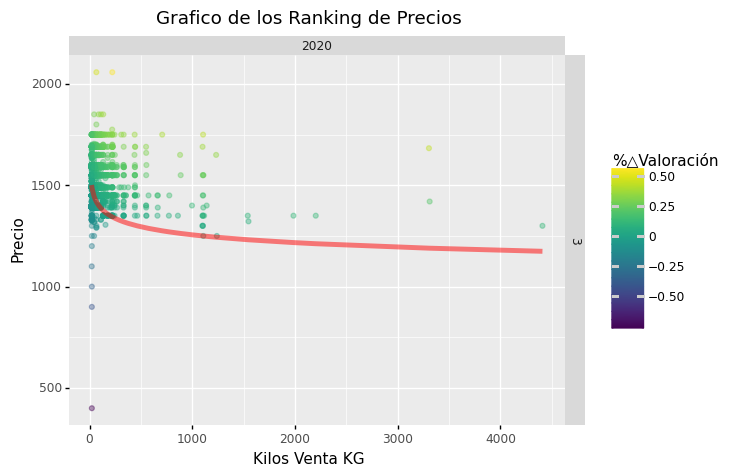

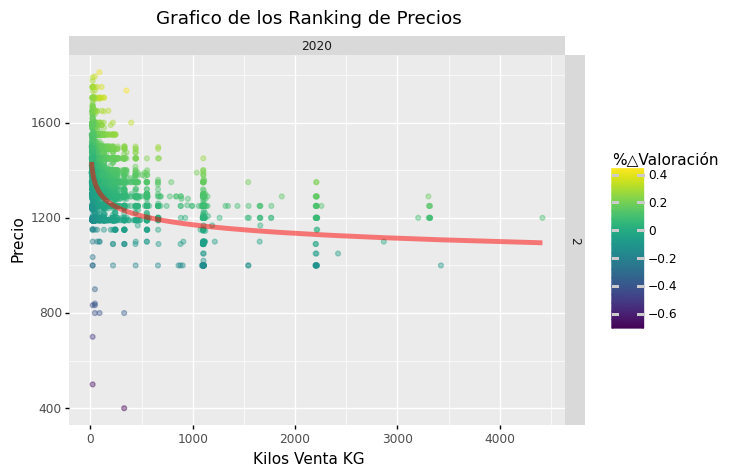

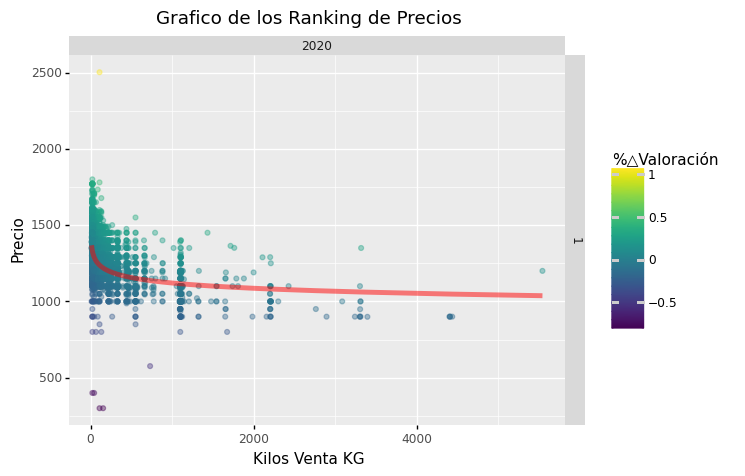

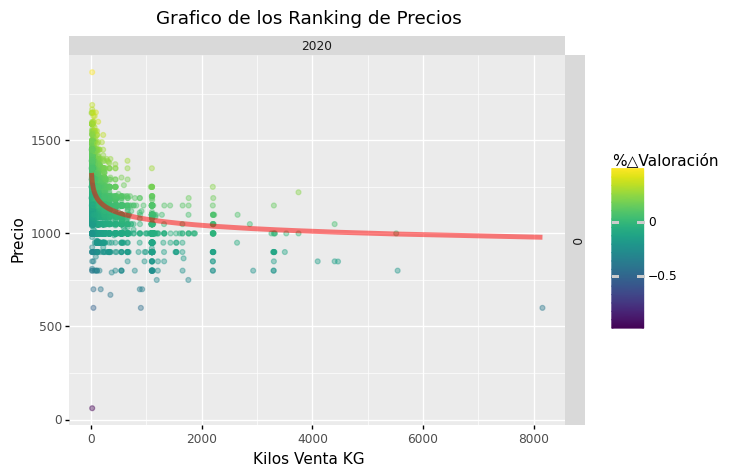

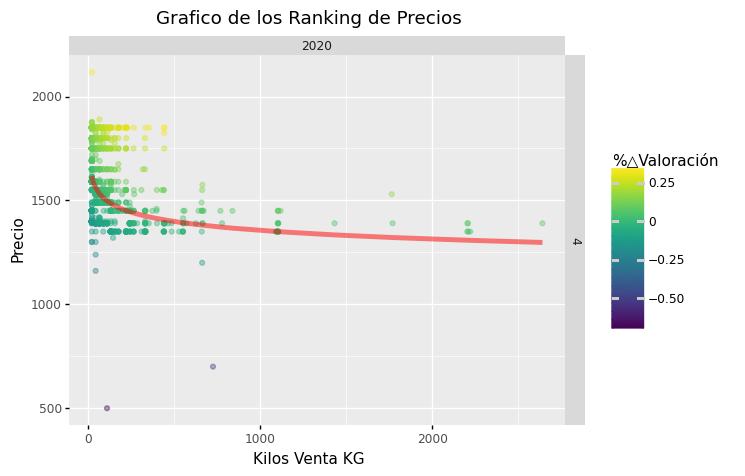

[<ggplot: (147451696372)>,
 <ggplot: (147451702809)>,
 <ggplot: (147445483632)>,
 <ggplot: (147451737826)>,
 <ggplot: (147451732550)>]

In [257]:
# Graph_Disp=list()

Graph_Disp=[
    ggplot(
        Df[(Df['Tipo de Semana']==i)
          &(Df.Año=='2020')
          ]
           , aes(x='Kilos Venta KG',y='Precio'
                  ,color='%△Valoración'
                  )
          )\
+ geom_point(alpha=0.4)\

+ geom_line(aes(x='Kilos Venta KG',y='Precio Estimado'),
            color='red', size=2,alpha=0.5)\
            + facet_grid('Tipo de Semana~Año')\
+ggtitle('Grafico de los Ranking de Precios')

for i in Df['Tipo de Semana'].unique()
]
Graph_Disp

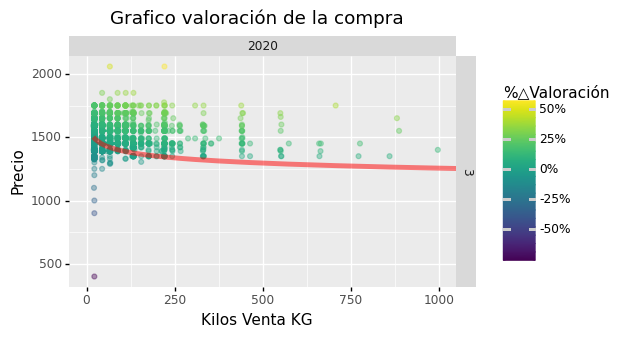

<ggplot: (147477633458)>

In [265]:
# Graph_Disp=list()

Graph_Disp=[
    ggplot(
        Df[(Df['Tipo de Semana']==i)
          &(Df.Año=='2020')
          ]
           , aes(x='Kilos Venta KG',y='Precio'
                  ,color='%△Valoración'
                  )
          )\
+ geom_point(alpha=0.4)\

+ geom_line(aes(x='Kilos Venta KG',y='Precio Estimado'),
            color='red', size=2,alpha=0.5)\
            + facet_grid('Tipo de Semana~Año')\
+ggtitle('Grafico valoración de la compra')

+ scale_color_continuous(labels=percent_format()) # display labels as a percentage    
+coord_cartesian(xlim = [0,1000])
+theme(
#               axis_text_x = element_text(angle=60, hjust=1),
        figure_size=(5,3))
for i in Df['Tipo de Semana'].unique()
]
Graph_Disp[0]

In [264]:
Df['Tipo de Semana'].unique()

array(['3', '2', '1', '0', '4'], dtype=object)

In [266]:
# ```python
file_name=('Valoración del precio Kg')

pngfill=      Png_file_direct_Graphic_Canal_Material\
        +"\\Otros Atributos\\Disp_Pago"

start_time = time.time()
save_as_pdf_pages(
                    Graph_Disp
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Otros Atributos\Disp_Pago\Valoración del precio Kg.pdf


Time Lapsed = 0:0:12.09548568725586 
 H:m:s
